<a href="https://colab.research.google.com/github/nicolas-errandonea/TFG/blob/TFGcodes/Realexperience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
import random
drive.mount('/content/gdrive', force_remount=True)
path1 = "/content/gdrive/My Drive/Boots_kelly/data_kelly_bundesliga.csv"
path2 = "/content/gdrive/My Drive/Boots_kelly/data_kelly_liga.csv"
path3 = "/content/gdrive/My Drive/Boots_kelly/data_kelly_seriea.csv"
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)


Mounted at /content/gdrive


In [ ]:
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import numpy
from sklearn import metrics
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import statistics
import math
import scipy.optimize as spo
import scipy

In [ ]:
data_kelly = pd.concat([df1, df2,df3])
data_kelly=data_kelly.reset_index(drop=True)

In [ ]:
data_kelly=data_kelly.iloc[::-1]
data_kelly=data_kelly.reset_index(drop=True)

In [ ]:
data_kelly

,B365H,B365D,B365A,h_result,d_result,a_result,home_prob,draw_prob,away_prob,h_bet,d_bet,a_bet,reality,w_value_mean
0,1.79,4.52,4.01,0,1,0,0.591789,0.226645,0.181566,0.642157,0.238934,0.118909,1.079981,0.373832
1,1.36,5.37,9.65,1,0,0,0.695483,0.171245,0.133273,0.673141,0.160597,0.166262,0.915472,0.188467
2,2.66,3.55,2.75,0,0,1,0.324853,0.324366,0.350781,0.280916,0.373563,0.345521,0.950183,0.490677
3,5.01,4.02,1.74,0,0,1,0.263970,0.245374,0.490656,0.334542,0.247599,0.417859,0.727074,0.773733
4,5.50,4.25,1.65,0,0,1,0.163716,0.218783,0.617501,0.149406,0.207438,0.643156,1.061207,0.434479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1.72,4.34,4.55,0,1,0,0.551410,0.260150,0.188440,0.538626,0.298510,0.162864,1.295531,0.369656
1136,2.06,4.41,3.17,1,0,0,0.326161,0.258543,0.415296,0.175751,0.298212,0.526037,0.362047,0.690315
1137,2.27,4.16,2.89,1,0,0,0.323054,0.276721,0.400225,0.214260,0.320753,0.464987,0.486370,0.537754
1138,1.41,5.26,7.59,1,0,0,0.593182,0.262819,0.143999,0.495510,0.343874,0.160616,0.698669,0.405472


In [ ]:
def vect_results(money_earned,num1,defin,boot,year,typeof,maxuse,mean,sd,loss):
  if(num1==0):
   year.append('First_season')
  if(num1==1):
   year.append('Second_season')
  if(num1==2):
   year.append('Third_season')
  if(num1==3):
    year.append('season_21-22')
  if(defin==0):
    maxuse.append('mean_constraint')
  if(defin==1):
    maxuse.append('max:constraint')
  if(boot==0):
    typeof.append('frac_kelly')
  if(boot==1):
    typeof.append('max_boots')
  if(boot==2):
    typeof.append('mean_boots_kelly')
  if(boot==3):
    typeof.append('cuant_boots')
  mean.append(statistics.mean(money_earned))
  fracaso=0
  for z in money_earned:
   if(z<100):
    fracaso=fracaso+1
  loss.append(fracaso/10000)
  sd.append(numpy.std(money_earned))
  return year,typeof,maxuse,mean,sd,loss
  

In [ ]:
def boots_kelly_function_def(data_kelly,num1,year,typeof,maxuse,mean,sd,loss):
 money_earned_mean=[]
 import math
 for z in range(10000):
   kelly=data_kelly.sample(n=1100)
   kelly=kelly.reset_index()
   kelly =kelly.drop('index', 1)
   w=100
   for j in kelly.index:
      if(kelly.B365H[j]*kelly.h_bet[j]*kelly.home_prob[j]+kelly.B365D[j]*kelly.d_bet[j]*kelly.draw_prob[j]+kelly.B365A[j]*kelly.a_bet[j]*kelly.away_prob[j]>1.05):
         p=scipy.stats.percentileofscore(kelly.w_value_mean,kelly.w_value_mean[j] , 'strict')/100
         w=(kelly.reality[j])*w/(7*(2+p)) +w*(1-1/(7*(2+p)))
   money_earned_mean.append(w)
 year,typeof,maxuse,mean,sd,loss=vect_results(money_earned_mean,num1,0,2,year,typeof,maxuse,mean,sd,loss)
 return year,typeof,maxuse,mean,sd,loss,money_earned_mean

In [ ]:
def kelly_function_def(data_kelly,num1,year,typeof,maxuse,mean,sd,loss):
 money_earned=[]
 import math
 for z in range(10000):
   kelly=data_kelly.sample(n=1100)
   kelly=kelly.reset_index()
   kelly =kelly.drop('index', 1)
   w=100
   for j in kelly.index:
      if(kelly.B365H[j]*kelly.h_bet[j]*kelly.home_prob[j]+kelly.B365D[j]*kelly.d_bet[j]*kelly.draw_prob[j]+kelly.B365A[j]*kelly.a_bet[j]*kelly.away_prob[j]>1.05):
           w=(kelly.reality[j])*w/(15) +w*(1-1/15)
   money_earned.append(w)
 year,typeof,maxuse,mean,sd,loss=vect_results(money_earned,num1,0,0,year,typeof,maxuse,mean,sd,loss)
 return year,typeof,maxuse,mean,sd,loss,money_earned

In [ ]:
import random
year=[]
typeof=[]
maxuse=[]
mean=[]
sd=[]
loss=[]
num1=3
year,typeof,maxuse,mean,sd,loss,money_earned_mean=boots_kelly_function_def(data_kelly,num1,year,typeof,maxuse,mean,sd,loss)
year,typeof,maxuse,mean,sd,loss,money_earned_goodk=kelly_function_def(data_kelly,num1,year,typeof,maxuse,mean,sd,loss)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [ ]:
#nos construimos la tabla
tabla=pd.DataFrame(year,columns=['year'])
tabla['type of']=typeof
tabla['max use']=maxuse
tabla['mean']=mean
tabla['sd']=sd
tabla['loss']=loss

In [ ]:
tabla

,year,type of,max use,mean,sd,loss
0,season_21-22,mean_boots_kelly,mean_constraint,148.993570,12.698539,0.0006
1,season_21-22,frac_kelly,mean_constraint,151.136371,15.134257,0.0018


In [ ]:
tabla.to_csv('real_exp.csv',index=False)
!cp real_exp.csv "/content/gdrive/My Drive/Boots_kelly/"

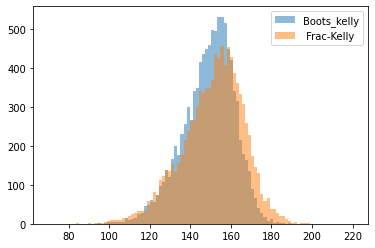

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
bins = np.linspace(70, 220, 100)

plt.hist(money_earned_mean, bins, alpha=0.5, label='Boots_kelly')
plt.hist(money_earned_goodk, bins, alpha=0.5, label=' Frac-Kelly')
plt.legend(loc='upper right')
plt.show()